In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns


In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [37]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier

from sklearn import metrics

In [38]:
from imblearn.under_sampling import NearMiss

In [39]:
df_06 = pd.read_csv('datasets/htx_2006_weather.csv', na_values='Blank').dropna()
df_10 = pd.read_csv('datasets/htx_2010_weather.csv', na_values='Blank').dropna()
df_11 = pd.read_csv('datasets/htx_2011_weather.csv', na_values='Blank').dropna()
df_12 = pd.read_csv('datasets/htx_2012_weather.csv', na_values='Blank').dropna() 
df_13 = pd.read_csv('datasets/htx_2013_weather.csv', na_values='Blank').dropna()
df_14 = pd.read_csv('datasets/htx_2014_weather.csv', na_values='Blank').dropna()
df_15 = pd.read_csv('datasets/htx_2015_weather.csv', na_values='Blank').dropna()
df_18 = pd.read_csv('datasets/htx_2018_weather.csv', na_values='Blank').dropna()
df_19 = pd.read_csv('datasets/htx_2019_weather.csv', na_values='Blank').dropna()
df_21 = pd.read_csv('datasets/htx_2021_weather.csv', na_values='Blank').dropna()

# df = pd.concat([df_10, df_11, df_12, df_13, df_14, df_15])

df = pd.concat([df_06, df_10, df_11, df_12, df_13, df_14, df_15, df_18, df_19, df_21])
# df = df_06

In [40]:
df.rain_tomorrow = df.rain_tomorrow.map(dict(Yes=1, No=0))


In [41]:
df['rainfall_tomorrow'] = df['rainfall'].shift(1)
df.dropna()
df.head

<bound method NDFrame.head of            date  min_temp  max_temp  rainfall  wind_speed9am  wind_speed3pm  \
0    2006-01-01      64.0      81.0       0.0            8.0           14.0   
1    2006-01-02      57.0      79.0       0.0            9.0           10.0   
2    2006-01-03      49.0      79.0       0.0            0.0           10.0   
3    2006-01-04      52.0      76.0       0.0            7.0            7.0   
4    2006-01-05      51.0      69.0       0.0           16.0           23.0   
..          ...       ...       ...       ...            ...            ...   
360  2021-12-27      68.0      81.0       0.0            5.0           16.0   
361  2021-12-28      72.0      84.0       0.0           14.0           15.0   
362  2021-12-29      72.0      84.0       0.0            9.0           12.0   
363  2021-12-30      67.0      83.0       0.0            8.0            9.0   
364  2021-12-31      73.0      85.0       0.0           10.0           17.0   

     humidity9am  hum

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3617 entries, 0 to 364
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               3617 non-null   object 
 1   min_temp           3617 non-null   float64
 2   max_temp           3617 non-null   float64
 3   rainfall           3617 non-null   float64
 4   wind_speed9am      3617 non-null   float64
 5   wind_speed3pm      3617 non-null   float64
 6   humidity9am        3617 non-null   float64
 7   humidity3pm        3617 non-null   float64
 8   pressure9am        3617 non-null   float64
 9   pressure3pm        3617 non-null   float64
 10  cloud9am           3617 non-null   object 
 11  cloud3pm           3617 non-null   object 
 12  temp9am            3617 non-null   float64
 13  temp3pm            3617 non-null   float64
 14  rain_today         3617 non-null   object 
 15  rain_tomorrow      3617 non-null   int64  
 16  rainfall_tomorrow  3616 n

In [43]:
rainfall = df['rainfall'].to_numpy()


In [44]:
df.describe().T #measures of spread 

,count,mean,std,min,25%,50%,75%,max
min_temp,3617.0,62.720210,14.211336,0.00,52.00,66.00,75.00,83.00
max_temp,3617.0,79.484932,12.915457,27.00,72.00,82.00,90.00,106.00
rainfall,3617.0,0.286066,1.167100,0.00,0.00,0.00,0.00,20.60
wind_speed9am,3617.0,8.797346,4.597471,0.00,6.00,8.00,12.00,30.00
wind_speed3pm,3617.0,10.588886,4.891796,0.00,7.00,10.00,14.00,31.00
humidity9am,3617.0,70.145701,15.841515,10.00,63.00,71.00,81.00,97.00
humidity3pm,3617.0,54.371026,18.373612,9.00,42.00,54.00,67.00,97.00
pressure9am,3617.0,30.015012,0.164393,29.46,29.91,29.99,30.10,30.72
pressure3pm,3617.0,29.943276,0.158386,29.39,29.84,29.93,30.03,30.59
temp9am,3617.0,70.783522,14.127046,19.00,61.00,74.00,83.00,94.00


In [45]:
print(df.describe())

          min_temp     max_temp     rainfall  wind_speed9am  wind_speed3pm  \
count  3617.000000  3617.000000  3617.000000    3617.000000    3617.000000   
mean     62.720210    79.484932     0.286066       8.797346      10.588886   
std      14.211336    12.915457     1.167100       4.597471       4.891796   
min       0.000000    27.000000     0.000000       0.000000       0.000000   
25%      52.000000    72.000000     0.000000       6.000000       7.000000   
50%      66.000000    82.000000     0.000000       8.000000      10.000000   
75%      75.000000    90.000000     0.000000      12.000000      14.000000   
max      83.000000   106.000000    20.600000      30.000000      31.000000   

       humidity9am  humidity3pm  pressure9am  pressure3pm      temp9am  \
count  3617.000000  3617.000000  3617.000000  3617.000000  3617.000000   
mean     70.145701    54.371026    30.015012    29.943276    70.783522   
std      15.841515    18.373612     0.164393     0.158386    14.127046   
m

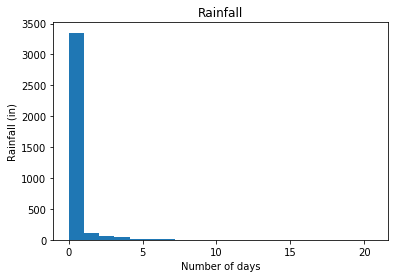

In [46]:
plt.hist(rainfall, bins=20)

plt.xlabel("Number of days")
plt.ylabel("Rainfall (in)")
plt.title("Rainfall")

plt.show()

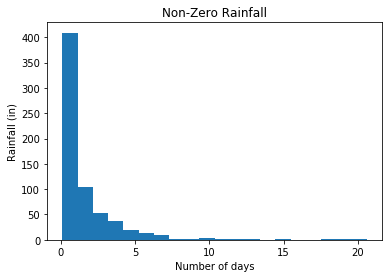

In [47]:
non_zero_rainfall = rainfall[rainfall != 0]
plt.hist(non_zero_rainfall, bins=20)

plt.xlabel("Number of days")
plt.ylabel("Rainfall (in)")
plt.title("Non-Zero Rainfall")

plt.show()

plt.show() 

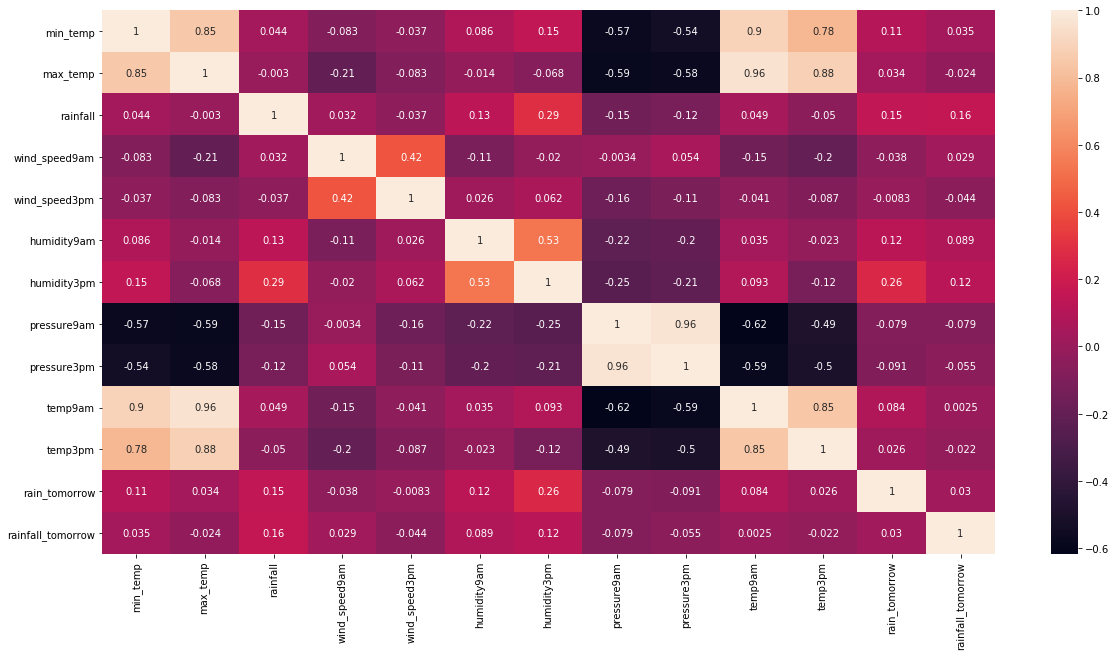

In [48]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(), annot = True) #generate heatmap, show data value in each cell 

observations: 
- max_temp and temp_9am have high correlation 
- min_temp and temp_9am have high correlation
- pressure_9am ad pressure_3pm have high positive correlation 
- rainfall seems to have the highes positive correlation with humidity_3pm (.29), 
followed by rainfall and then humidity_9am  

In [49]:
# TODO: plot distributions: 


In [50]:
# end data analysis and visualization 


In [51]:
#option 2: split by year: 

# year = pd.to_datetime(df.Date).dt.year

# train = df[year < 2015]
# validate = df[year == 2015]
# test = df[year > 2015]

In [52]:
train, validate, test = \
              np.split(df.sample(frac=1, random_state=42), 
                       [int(.6*len(df)), int(.8*len(df))])

In [53]:
input_cols = [
                'min_temp', 
                'max_temp', 
                'wind_speed9am', 
                'wind_speed3pm', 
                'humidity9am', 
                'humidity3pm', 
                'pressure9am', 
                'pressure3pm', 
                'temp9am', 
                'temp3pm',
                'rainfall']

target_col = ['rain_tomorrow'] #yes/no will it rain tomorrow 

In [54]:
x_val = validate[input_cols]
y_val = validate[['rain_tomorrow']]

In [55]:
x_train = train[input_cols]
y_train = train[['rain_tomorrow']]

In [56]:
x_test = test[input_cols]
y_test = test[['rain_tomorrow']]

In [57]:
# TODO: add graph showing the imbalance of no/yes's for rain tomorrow 

In [58]:
#option 1: using nearMidd 

# nm = NearMiss()
# x_train_resampled, y_train_resampled = nm.fit_resample(x_train, y_train)

In [59]:
#option 2:  random undersampler 
from imblearn.over_sampling import RandomOverSampler
over_sampler = RandomOverSampler(sampling_strategy='minority', random_state=42)
x_train_resampled, y_train_resampled = over_sampler.fit_resample(x_train, y_train)

In [61]:
x_train = x_train_resampled
y_train = y_train_resampled

In [ ]:
# y_train = train[['rain_tomorrow']]

In [ ]:
#scaling numeric columns to standardize 
# ML would weigh higher values greater than smaller values regardless of unit without scaling

scaler = MinMaxScaler().fit(df[input_cols])

x_val[input_cols] = scaler.transform(x_val[input_cols])
x_test[input_cols] = scaler.transform(x_test[input_cols])
x_train[input_cols] = scaler.transform(x_train[input_cols])
# x_train_resampled[input_cols] = scaler.transform(x_train_resampled[input_cols])

c:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:2969: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.loc._setitem_with_indexer((slice(None), indexer), value)
c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:2935: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentatio

In [ ]:
x_val.describe().loc[['min', 'max']]

,min_temp,max_temp,wind_speed9am,wind_speed3pm,humidity9am,humidity3pm,pressure9am,pressure3pm,temp9am,temp3pm,rainfall
min,0.0,0.075949,0.0,0.000000,0.0,0.0,0.047619,0.033333,0.0,0.0,0.000000
max,1.0,0.949367,1.0,0.935484,1.0,1.0,1.000000,0.991667,1.0,1.0,0.912621


In [ ]:
# model = RandomForestClassifier(n_estimators = 100) 
model = DecisionTreeClassifier(random_state=42)
# model.fit(x_train_resampled, y_train_resampled)
model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
#TODO: redo evaluation 

y_pred = model.predict(x_test)

In [ ]:
print('Training Accuracy Score: {:.2f}'.format(model.score(x_train_resampled,y_train_resampled)*100)) #train

Training Accuracy Score: 100.00


In [ ]:
print('Test Accuracy Score: {:.2f}'.format(model.score(x_test,y_test)*100)) #train

Test Accuracy Score: 36.19


In [ ]:
print('Validation Accuracy Score: {:.2f}'.format(model.score(x_val,y_val)*100)) #validation  

Validation Accuracy Score: 36.65


In [ ]:
print('Accuracy Score: {:.2f}'.format(metrics.accuracy_score(y_test, y_pred)*100))


# this score would be .82 if we didn't rebalance bc of the large amount of nos 

Accuracy Score: 36.19


In [ ]:
print('F1 Score: {:.2f}'.format(metrics.f1_score(y_test, y_pred) * 100))


F1 Score: 25.72


In [ ]:
#numerical for random forest 